In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
%matplotlib inline

In [2]:
import os
os.getcwd()

'C:\\Users\\hp\\MTECH PROJECT'

In [3]:
Dataset=pd.read_excel('ModelDataset.xlsx')
Dataset.head()

,H2/CO2,H2/CO,Temp,Pres,PrepM,GHSV,W/F,Catalyst,BET SA,Pore Vol,...,Catalyst E3,Comp E3,Catalyst E4,Comp E4,CO2 Conv,CO Conv,Methanol STY,DME STY,Methanol Sel,DME Sel
0,3.0,NaN,573,2.0,CP,24000.0,NaN,CdZrOx,52.0,NaN,...,NaN,NaN,ZrO2,0.862,5.40,NaN,NaN,NaN,80.0,NaN
1,3.0,NaN,423,3.2,CP,NaN,NaN,CoMn LDHs,83.6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,176.10,NaN,NaN,NaN
2,3.0,NaN,423,3.2,CP,NaN,NaN,NiCo LDHs,46.8,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,335.70,NaN,NaN,NaN
3,3.0,NaN,533,3.0,CP,NaN,1.56,Cu/AlCeO,80.0,0.500,...,NaN,NaN,Al2O3,0.194,17.00,NaN,11.90,NaN,44.7,NaN
4,3.0,NaN,523,3.0,MW assisted IWI,3000.0,NaN,(CuZnGa)microwave,17.0,0.168,...,NaN,NaN,ZnO,0.785,9.77,NaN,3.71,NaN,42.8,NaN


# EDA and FEATURE ENGG

In [4]:
Dataset=Dataset.drop(columns=['H2/CO','GHSV','Catalyst','Catalyst E1','Catalyst E2','Catalyst E3','Catalyst E4','CO Conv','DME STY','DME Sel'],axis=1)
Dataset.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,CP,NaN,52.0,NaN,NaN,NaN,NaN,0.138,NaN,NaN,0.862,5.40,NaN,80.0
1,3.0,423,3.2,CP,NaN,83.6,NaN,NaN,NaN,NaN,0.683,0.317,NaN,NaN,NaN,176.10,NaN
2,3.0,423,3.2,CP,NaN,46.8,NaN,NaN,NaN,NaN,0.660,0.330,NaN,NaN,NaN,335.70,NaN
3,3.0,533,3.0,CP,1.56,80.0,0.500,22.7,NaN,41.4,0.612,0.194,NaN,0.194,17.00,11.90,44.7
4,3.0,523,3.0,MW assisted IWI,NaN,17.0,0.168,NaN,19.0,7.3,0.166,0.049,NaN,0.785,9.77,3.71,42.8


In [5]:
Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2         126
Comp E3         272
Comp E4           6
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [6]:
#HANDLING NULL VALUES

In [7]:
Dataset['Comp E2']=Dataset['Comp E2'].fillna(0)
Dataset['Comp E3']=Dataset['Comp E3'].fillna(0)
Dataset['Comp E4']=Dataset['Comp E4'].fillna(0)

Dataset.isnull().sum()

H2/CO2            0
Temp              0
Pres              0
PrepM             0
W/F             100
BET SA           72
Pore Vol        154
Pore Size       218
Crystal Size    148
Metal SA        155
Comp E1           0
Comp E2           0
Comp E3           0
Comp E4           0
CO2 Conv         17
Methanol STY     36
Methanol Sel     17
dtype: int64

In [8]:
Dataset['W/F']=Dataset['W/F'].fillna(Dataset['W/F'].median())
Dataset['BET SA']=Dataset['BET SA'].fillna(Dataset['BET SA'].median())
Dataset['Pore Vol']=Dataset['Pore Vol'].fillna(Dataset['Pore Vol'].median())
Dataset['Pore Size']=Dataset['Pore Size'].fillna(Dataset['Pore Size'].median())
Dataset['Crystal Size']=Dataset['Crystal Size'].fillna(Dataset['Crystal Size'].median())
Dataset['Metal SA']=Dataset['Metal SA'].fillna(Dataset['Metal SA'].median())
Dataset['CO2 Conv']=Dataset['CO2 Conv'].fillna(Dataset['CO2 Conv'].median())
Dataset['Methanol STY']=Dataset['Methanol STY'].fillna(Dataset['Methanol STY'].median())
Dataset['Methanol Sel']=Dataset['Methanol Sel'].fillna(Dataset['Methanol Sel'].mean())

Dataset.isnull().sum()


H2/CO2          0
Temp            0
Pres            0
PrepM           0
W/F             0
BET SA          0
Pore Vol        0
Pore Size       0
Crystal Size    0
Metal SA        0
Comp E1         0
Comp E2         0
Comp E3         0
Comp E4         0
CO2 Conv        0
Methanol STY    0
Methanol Sel    0
dtype: int64

In [9]:
#LABEL ENCODING for Preparation Method

In [10]:
label_encoder = LabelEncoder()
Dataset['PrepM']=label_encoder.fit_transform(Dataset['PrepM'])

In [11]:
Dataset

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,Comp E1,Comp E2,Comp E3,Comp E4,CO2 Conv,Methanol STY,Methanol Sel
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,0.1380,0.000000,0.0,0.862000,5.40,3.008875,80.000000
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,0.6830,0.317000,0.0,0.000000,9.77,176.100000,54.742963
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,0.6600,0.330000,0.0,0.000000,9.77,335.700000,54.742963
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,0.6120,0.194000,0.0,0.194000,17.00,11.900000,44.700000
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,0.1660,0.049000,0.0,0.785000,9.77,3.710000,42.800000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0092,0.000289,0.0,0.990511,9.77,35.000000,54.742963
364,3.0,425,3.2,12,2.315,84.0,0.380,6.755,14.2,16.9,0.0102,0.000320,0.0,0.989480,9.77,30.200000,54.742963
365,3.0,303,0.1,4,4.670,63.6,0.380,6.755,14.2,16.9,0.0200,0.000000,0.0,0.980000,37.00,11.090000,62.600000
366,3.0,573,2.0,3,0.930,44.3,0.380,6.755,14.2,16.9,0.0965,0.000000,0.0,0.903500,4.90,7.750000,90.100000


# CATALYST PROPERTY DATASET

In [12]:
Final_Property=pd.read_excel('Final_Properties_Dataset.xlsx')
Final_Property.head()

,Unnamed: 0,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


In [13]:
Final_Property=Final_Property.drop(columns='Unnamed: 0')
Final_Property.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,4.165567,5.796074,-1.646255,3.145444,5.499135,-0.017166,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,0.231088,-1.443908,-1.286246,5.183665,-3.174846,1.672549,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,0.231088,-1.443908,-1.286246,5.183665,-3.559289,1.194096,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,-2.163904,-0.235893,0.134307,-0.169250,-2.511624,3.794347,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,-2.163904,-0.235893,0.134307,-0.169250,-2.679058,-0.246068,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


# FINAL DATASET

In [14]:
Data=pd.concat([Dataset,Final_Property],axis=1)
Data.head()

,H2/CO2,Temp,Pres,PrepM,W/F,BET SA,Pore Vol,Pore Size,Crystal Size,Metal SA,...,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16
0,3.0,573,2.0,3,2.315,52.0,0.380,6.755,14.2,16.9,...,0.087293,0.044824,-2.166423,-0.133318,0.051257,0.028417,-3.240133,-1.222075,0.007181,-0.272100
1,3.0,423,3.2,3,2.315,83.6,0.380,6.755,14.2,16.9,...,-0.179113,2.686381,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
2,3.0,423,3.2,3,2.315,46.8,0.380,6.755,14.2,16.9,...,1.420632,0.871031,-2.166423,-0.133318,0.051257,0.028417,-2.093964,7.027157,9.268082,-1.902330
3,3.0,533,3.0,3,1.560,80.0,0.500,22.700,14.2,41.4,...,-2.577246,-1.618209,-2.166423,-0.133318,0.051257,0.028417,2.544792,2.618640,-1.141347,-0.941758
4,3.0,523,3.0,11,2.315,17.0,0.168,6.755,19.0,7.3,...,-1.292825,0.365615,-2.166423,-0.133318,0.051257,0.028417,0.275136,1.814672,0.275060,3.237843


In [15]:
X=Data.drop(columns=['CO2 Conv','Methanol STY','Methanol Sel'])
X.shape


(368, 30)

In [16]:
Y=Data['CO2 Conv']
Y.shape


(368,)

# ANN

In [17]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner.tuners import RandomSearch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.constraints import max_norm


In [18]:
#TrainTestSplit
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.1,random_state=2)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(331, 30)
(37, 30)
(331,)
(37,)


In [19]:
#DATA STANDARDIZATION

In [20]:
scaling=StandardScaler()
X_train=scaling.fit_transform(X_train)
X_test=scaling.transform(X_test)

In [21]:
#HYPERPARAMETER TUNING

In [22]:
def build_model(hp):
    model = keras.Sequential()
    for i in range(hp.Int('num_layers', 2, 30)):
        model.add(layers.Dense(units=hp.Int('units_' + str(i),
                                            min_value=32,
                                            max_value=512,
                                            step=32),
                               activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])),loss='mse',metrics=['mse','mae'])
    return model

In [23]:
tuner = RandomSearch(build_model,objective='val_loss',max_trials=5,executions_per_trial=3,directory='PROJECT1',project_name='CO2 to Methanol Conversion')


INFO:tensorflow:Reloading Oracle from existing project PROJECT1\CO2 to Methanol Conversion\oracle.json
INFO:tensorflow:Reloading Tuner from PROJECT1\CO2 to Methanol Conversion\tuner0.json


In [24]:
tuner.search_space_summary()

Search space summary
Default search space size: 25
num_layers (Int)
{'default': None, 'conditions': [], 'min_value': 2, 'max_value': 30, 'step': 1, 'sampling': None}
units_0 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_1 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
learning_rate (Choice)
{'default': 0.01, 'conditions': [], 'values': [0.01, 0.001, 0.0001], 'ordered': True}
units_2 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_3 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_4 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_5 (Int)
{'default': None, 'conditions': [], 'min_value': 32, 'max_value': 512, 'step': 32, 'sampling': None}
units_6 (Int)
{'default': None, 'co

In [25]:
tuner.search(X_train, Y_train, epochs=50, callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=10)], validation_data=(X_test, Y_test))


INFO:tensorflow:Oracle triggered exit


In [26]:
tuner.results_summary()

Results summary
Results in PROJECT1\CO2 to Methanol Conversion
Showing 10 best trials
Trial summary
Hyperparameters:
num_layers: 7
units_0: 320
units_1: 320
learning_rate: 0.001
units_2: 96
units_3: 512
units_4: 288
units_5: 512
units_6: 160
Score: 10.307056427001953
Trial summary
Hyperparameters:
num_layers: 15
units_0: 320
units_1: 384
learning_rate: 0.001
units_2: 192
units_3: 64
units_4: 224
units_5: 352
units_6: 224
units_7: 32
units_8: 32
units_9: 32
units_10: 32
units_11: 32
units_12: 32
units_13: 32
units_14: 32
Score: 11.420954386393229
Trial summary
Hyperparameters:
num_layers: 23
units_0: 192
units_1: 224
learning_rate: 0.0001
units_2: 192
units_3: 224
units_4: 96
units_5: 352
units_6: 480
units_7: 192
units_8: 480
units_9: 288
units_10: 320
units_11: 224
units_12: 256
units_13: 352
units_14: 192
units_15: 32
units_16: 32
units_17: 32
units_18: 32
units_19: 32
units_20: 32
units_21: 32
units_22: 32
Score: 11.650955518086752
Trial summary
Hyperparameters:
num_layers: 7
units_

In [27]:
# ANN 

In [28]:
model = Sequential()


model.add(Dense(320, activation='relu'))
model.add(Dense(320, activation='relu'))
model.add(Dense(96, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(288, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(160, activation='relu'))


model.add(Dense(1, activation='linear'))

In [29]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse',metrics=['mae','mse'])

In [30]:
model_history=model.fit(x=X_train, y=Y_train, epochs=1000, validation_data=(X_test, Y_test))


Epoch 1/1000
11/11 [==============================] - 3s 72ms/step - loss: 127.7437 - mae: 8.5771 - mse: 127.7437 - val_loss: 51.4271 - val_mae: 5.6936 - val_mse: 51.4271
Epoch 2/1000
11/11 [==============================] - 0s 16ms/step - loss: 63.0485 - mae: 5.9297 - mse: 63.0485 - val_loss: 36.1452 - val_mae: 4.8160 - val_mse: 36.1452
Epoch 3/1000
11/11 [==============================] - 0s 16ms/step - loss: 49.0869 - mae: 5.0631 - mse: 49.0869 - val_loss: 51.1724 - val_mae: 5.5434 - val_mse: 51.1724
Epoch 4/1000
11/11 [==============================] - 0s 15ms/step - loss: 33.5483 - mae: 4.1466 - mse: 33.5483 - val_loss: 27.0087 - val_mae: 4.3948 - val_mse: 27.0087
Epoch 5/1000
11/11 [==============================] - 0s 14ms/step - loss: 25.7233 - mae: 3.6953 - mse: 25.7233 - val_loss: 23.8545 - val_mae: 3.8765 - val_mse: 23.8545
Epoch 6/1000
11/11 [==============================] - 0s 16ms/step - loss: 19.8208 - mae: 3.0864 - mse: 19.8208 - val_loss: 21.1268 - val_mae: 3.6754 - v

Epoch 50/1000
11/11 [==============================] - 0s 14ms/step - loss: 2.1457 - mae: 0.9718 - mse: 2.1457 - val_loss: 10.2106 - val_mae: 2.3133 - val_mse: 10.2106
Epoch 51/1000
11/11 [==============================] - 0s 14ms/step - loss: 2.0025 - mae: 0.8958 - mse: 2.0025 - val_loss: 10.8805 - val_mae: 2.3905 - val_mse: 10.8805
Epoch 52/1000
11/11 [==============================] - 0s 16ms/step - loss: 1.7134 - mae: 0.8533 - mse: 1.7134 - val_loss: 11.5597 - val_mae: 2.5218 - val_mse: 11.5597
Epoch 53/1000
11/11 [==============================] - 0s 15ms/step - loss: 3.2305 - mae: 1.1607 - mse: 3.2305 - val_loss: 10.7447 - val_mae: 2.2788 - val_mse: 10.7447
Epoch 54/1000
11/11 [==============================] - 0s 14ms/step - loss: 3.6163 - mae: 1.1495 - mse: 3.6163 - val_loss: 12.1471 - val_mae: 2.5345 - val_mse: 12.1471
Epoch 55/1000
11/11 [==============================] - 0s 16ms/step - loss: 2.2537 - mae: 0.9124 - mse: 2.2537 - val_loss: 10.5626 - val_mae: 2.3510 - val_mse: 

Epoch 99/1000
11/11 [==============================] - 0s 14ms/step - loss: 2.2150 - mae: 0.8805 - mse: 2.2150 - val_loss: 12.8407 - val_mae: 2.5771 - val_mse: 12.8407
Epoch 100/1000
11/11 [==============================] - 0s 15ms/step - loss: 2.1669 - mae: 0.9782 - mse: 2.1669 - val_loss: 9.6844 - val_mae: 2.1980 - val_mse: 9.6844
Epoch 101/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.4707 - mae: 0.7572 - mse: 1.4707 - val_loss: 10.4276 - val_mae: 2.4273 - val_mse: 10.4276
Epoch 102/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.9278 - mae: 0.9078 - mse: 1.9278 - val_loss: 10.4338 - val_mae: 2.3758 - val_mse: 10.4338
Epoch 103/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.9419 - mae: 0.8950 - mse: 1.9419 - val_loss: 14.6850 - val_mae: 2.9559 - val_mse: 14.6850
Epoch 104/1000
11/11 [==============================] - 0s 15ms/step - loss: 5.5720 - mae: 1.4363 - mse: 5.5720 - val_loss: 9.9690 - val_mae: 2.3053 - val_mse

Epoch 148/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.9281 - mae: 0.6360 - mse: 0.9281 - val_loss: 9.9166 - val_mae: 2.2555 - val_mse: 9.9166
Epoch 149/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.7908 - mae: 0.5499 - mse: 0.7908 - val_loss: 10.9003 - val_mae: 2.3137 - val_mse: 10.9003
Epoch 150/1000
11/11 [==============================] - 0s 13ms/step - loss: 1.0025 - mae: 0.6458 - mse: 1.0025 - val_loss: 9.8573 - val_mae: 2.2793 - val_mse: 9.8573
Epoch 151/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.8157 - mae: 0.5559 - mse: 0.8157 - val_loss: 10.0850 - val_mae: 2.2801 - val_mse: 10.0850
Epoch 152/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.8537 - mae: 0.5352 - mse: 0.8537 - val_loss: 9.2791 - val_mae: 2.2224 - val_mse: 9.2791
Epoch 153/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.6845 - mae: 0.4617 - mse: 0.6845 - val_loss: 9.1799 - val_mae: 2.1930 - val_mse: 9

Epoch 197/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.6318 - mae: 0.4507 - mse: 0.6318 - val_loss: 9.4004 - val_mae: 2.2101 - val_mse: 9.4004
Epoch 198/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5907 - mae: 0.4102 - mse: 0.5907 - val_loss: 9.0643 - val_mae: 2.1398 - val_mse: 9.0643
Epoch 199/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5326 - mae: 0.3777 - mse: 0.5326 - val_loss: 8.4633 - val_mae: 2.1285 - val_mse: 8.4633
Epoch 200/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.7306 - mae: 0.4190 - mse: 0.7306 - val_loss: 8.6192 - val_mae: 2.1336 - val_mse: 8.6192
Epoch 201/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5998 - mae: 0.4183 - mse: 0.5998 - val_loss: 8.5604 - val_mae: 2.1543 - val_mse: 8.5604
Epoch 202/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.6685 - mae: 0.4340 - mse: 0.6685 - val_loss: 9.7024 - val_mae: 2.1754 - val_mse: 9.702

Epoch 246/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.9905 - mae: 0.6026 - mse: 0.9905 - val_loss: 9.5872 - val_mae: 2.2653 - val_mse: 9.5872
Epoch 247/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.6994 - mae: 0.4933 - mse: 0.6994 - val_loss: 9.8898 - val_mae: 2.3080 - val_mse: 9.8898
Epoch 248/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5286 - mae: 0.3896 - mse: 0.5286 - val_loss: 9.4885 - val_mae: 2.2227 - val_mse: 9.4885
Epoch 249/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5838 - mae: 0.4040 - mse: 0.5838 - val_loss: 10.1029 - val_mae: 2.2928 - val_mse: 10.1029
Epoch 250/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.6817 - mae: 0.4246 - mse: 0.6817 - val_loss: 9.6294 - val_mae: 2.2250 - val_mse: 9.6294
Epoch 251/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.6263 - mae: 0.4841 - mse: 0.6263 - val_loss: 9.1313 - val_mae: 2.1515 - val_mse: 9.1

Epoch 295/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.4066 - mae: 0.2934 - mse: 0.4066 - val_loss: 8.8253 - val_mae: 2.1341 - val_mse: 8.8253
Epoch 296/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.3989 - mae: 0.2886 - mse: 0.3989 - val_loss: 9.3070 - val_mae: 2.1732 - val_mse: 9.3070
Epoch 297/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.7171 - mae: 0.4393 - mse: 0.7171 - val_loss: 9.5644 - val_mae: 2.1858 - val_mse: 9.5644
Epoch 298/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.5182 - mae: 0.3651 - mse: 0.5182 - val_loss: 8.1170 - val_mae: 1.9917 - val_mse: 8.1170
Epoch 299/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5782 - mae: 0.3755 - mse: 0.5782 - val_loss: 8.9981 - val_mae: 2.2070 - val_mse: 8.9981
Epoch 300/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.7494 - mae: 0.5339 - mse: 0.7494 - val_loss: 9.7088 - val_mae: 2.2527 - val_mse: 9.708

Epoch 344/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5629 - mae: 0.4443 - mse: 0.5629 - val_loss: 8.3754 - val_mae: 2.1023 - val_mse: 8.3754
Epoch 345/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.6153 - mae: 0.4217 - mse: 0.6153 - val_loss: 8.3111 - val_mae: 2.0329 - val_mse: 8.3111
Epoch 346/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.7951 - mae: 0.4956 - mse: 0.7951 - val_loss: 8.5543 - val_mae: 2.0455 - val_mse: 8.5543
Epoch 347/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.8620 - mae: 0.4988 - mse: 0.8620 - val_loss: 8.1684 - val_mae: 2.0146 - val_mse: 8.1684
Epoch 348/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.7442 - mae: 0.5000 - mse: 0.7442 - val_loss: 7.7884 - val_mae: 1.9767 - val_mse: 7.7884
Epoch 349/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.1710 - mae: 0.7009 - mse: 1.1710 - val_loss: 7.7924 - val_mae: 2.0080 - val_mse: 7.792

Epoch 393/1000
11/11 [==============================] - 0s 16ms/step - loss: 2.7898 - mae: 1.0674 - mse: 2.7898 - val_loss: 10.9199 - val_mae: 2.4195 - val_mse: 10.9199
Epoch 394/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.3200 - mae: 0.6817 - mse: 1.3200 - val_loss: 7.9063 - val_mae: 2.0774 - val_mse: 7.9063
Epoch 395/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.8001 - mae: 0.5433 - mse: 0.8001 - val_loss: 8.3385 - val_mae: 2.1446 - val_mse: 8.3385
Epoch 396/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.9354 - mae: 0.5602 - mse: 0.9354 - val_loss: 8.8427 - val_mae: 2.1610 - val_mse: 8.8427
Epoch 397/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.0129 - mae: 0.6035 - mse: 1.0129 - val_loss: 8.1000 - val_mae: 2.0233 - val_mse: 8.1000
Epoch 398/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.9272 - mae: 0.5664 - mse: 0.9272 - val_loss: 8.4866 - val_mae: 2.0743 - val_mse: 8.4

11/11 [==============================] - 0s 16ms/step - loss: 0.7587 - mae: 0.5203 - mse: 0.7587 - val_loss: 8.2084 - val_mae: 2.0109 - val_mse: 8.2084
Epoch 443/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.6721 - mae: 0.4420 - mse: 0.6721 - val_loss: 7.7035 - val_mae: 1.9906 - val_mse: 7.7035
Epoch 444/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.1193 - mae: 0.5835 - mse: 1.1193 - val_loss: 7.3556 - val_mae: 1.9574 - val_mse: 7.3556
Epoch 445/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.8168 - mae: 0.5017 - mse: 0.8168 - val_loss: 9.4188 - val_mae: 2.1614 - val_mse: 9.4188
Epoch 446/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.6491 - mae: 0.3820 - mse: 0.6491 - val_loss: 7.9660 - val_mae: 1.9672 - val_mse: 7.9660
Epoch 447/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5475 - mae: 0.3768 - mse: 0.5475 - val_loss: 7.6999 - val_mae: 1.9638 - val_mse: 7.6999
Epoch 448/100

11/11 [==============================] - 0s 15ms/step - loss: 0.4011 - mae: 0.3462 - mse: 0.4011 - val_loss: 7.1741 - val_mae: 1.9024 - val_mse: 7.1741
Epoch 492/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.4564 - mae: 0.3671 - mse: 0.4564 - val_loss: 7.4053 - val_mae: 1.9531 - val_mse: 7.4053
Epoch 493/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.7166 - mae: 0.4365 - mse: 0.7166 - val_loss: 7.5065 - val_mae: 1.9221 - val_mse: 7.5065
Epoch 494/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.7343 - mae: 0.4663 - mse: 0.7343 - val_loss: 8.1043 - val_mae: 1.9853 - val_mse: 8.1043
Epoch 495/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.2971 - mae: 0.6739 - mse: 1.2971 - val_loss: 6.9051 - val_mae: 1.8733 - val_mse: 6.9051
Epoch 496/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.7912 - mae: 0.7744 - mse: 1.7912 - val_loss: 8.6607 - val_mae: 2.3127 - val_mse: 8.6607
Epoch 497/100

11/11 [==============================] - 0s 14ms/step - loss: 0.4963 - mae: 0.3281 - mse: 0.4963 - val_loss: 6.7491 - val_mae: 1.8801 - val_mse: 6.7491
Epoch 541/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.4868 - mae: 0.3755 - mse: 0.4868 - val_loss: 6.8303 - val_mae: 1.8592 - val_mse: 6.8303
Epoch 542/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.7595 - mae: 0.4793 - mse: 0.7595 - val_loss: 7.5667 - val_mae: 1.9630 - val_mse: 7.5667
Epoch 543/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.9810 - mae: 0.5735 - mse: 0.9810 - val_loss: 7.8916 - val_mae: 1.9986 - val_mse: 7.8916
Epoch 544/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.9563 - mae: 0.5390 - mse: 0.9563 - val_loss: 6.2806 - val_mae: 1.7587 - val_mse: 6.2806
Epoch 545/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.7531 - mae: 0.4379 - mse: 0.7531 - val_loss: 6.2313 - val_mae: 1.8168 - val_mse: 6.2313
Epoch 546/100

11/11 [==============================] - 0s 16ms/step - loss: 0.5212 - mae: 0.3687 - mse: 0.5212 - val_loss: 6.2581 - val_mae: 1.7422 - val_mse: 6.2581
Epoch 590/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.8396 - mae: 0.5456 - mse: 0.8396 - val_loss: 7.0005 - val_mae: 1.8654 - val_mse: 7.0005
Epoch 591/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5700 - mae: 0.3945 - mse: 0.5700 - val_loss: 6.1891 - val_mae: 1.7512 - val_mse: 6.1891
Epoch 592/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5434 - mae: 0.3754 - mse: 0.5434 - val_loss: 6.3620 - val_mae: 1.7439 - val_mse: 6.3620
Epoch 593/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3591 - mae: 0.3252 - mse: 0.3591 - val_loss: 6.1831 - val_mae: 1.7132 - val_mse: 6.1831
Epoch 594/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5250 - mae: 0.3335 - mse: 0.5250 - val_loss: 5.4411 - val_mae: 1.7325 - val_mse: 5.4411
Epoch 595/100

11/11 [==============================] - 0s 13ms/step - loss: 1.5065 - mae: 0.7233 - mse: 1.5065 - val_loss: 7.4135 - val_mae: 2.1423 - val_mse: 7.4135
Epoch 639/1000
11/11 [==============================] - 0s 16ms/step - loss: 1.8630 - mae: 0.9025 - mse: 1.8630 - val_loss: 7.6361 - val_mae: 2.2472 - val_mse: 7.6361
Epoch 640/1000
11/11 [==============================] - 0s 14ms/step - loss: 2.4457 - mae: 0.9828 - mse: 2.4457 - val_loss: 8.3262 - val_mae: 2.2778 - val_mse: 8.3262
Epoch 641/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.6293 - mae: 0.6943 - mse: 1.6293 - val_loss: 7.1962 - val_mae: 1.9285 - val_mse: 7.1962
Epoch 642/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.9926 - mae: 0.5581 - mse: 0.9926 - val_loss: 6.5800 - val_mae: 1.8918 - val_mse: 6.5800
Epoch 643/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.7719 - mae: 0.5065 - mse: 0.7719 - val_loss: 5.8323 - val_mae: 1.7783 - val_mse: 5.8323
Epoch 644/100

11/11 [==============================] - 0s 17ms/step - loss: 0.5073 - mae: 0.4161 - mse: 0.5073 - val_loss: 6.2545 - val_mae: 1.7604 - val_mse: 6.2545
Epoch 688/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.8422 - mae: 0.4631 - mse: 0.8422 - val_loss: 6.2124 - val_mae: 1.7453 - val_mse: 6.2124
Epoch 689/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.6186 - mae: 0.3778 - mse: 0.6186 - val_loss: 5.8628 - val_mae: 1.8259 - val_mse: 5.8628
Epoch 690/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.4652 - mae: 0.2938 - mse: 0.4652 - val_loss: 6.4522 - val_mae: 1.9031 - val_mse: 6.4522
Epoch 691/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.5092 - mae: 0.3425 - mse: 0.5092 - val_loss: 6.5831 - val_mae: 2.0032 - val_mse: 6.5831
Epoch 692/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.7098 - mae: 0.4258 - mse: 0.7098 - val_loss: 6.1366 - val_mae: 1.8909 - val_mse: 6.1366
Epoch 693/100

11/11 [==============================] - 0s 16ms/step - loss: 1.3568 - mae: 0.6671 - mse: 1.3568 - val_loss: 7.7443 - val_mae: 1.9371 - val_mse: 7.7443
Epoch 737/1000
11/11 [==============================] - 0s 14ms/step - loss: 3.2054 - mae: 1.0337 - mse: 3.2054 - val_loss: 10.3164 - val_mae: 2.5492 - val_mse: 10.3164
Epoch 738/1000
11/11 [==============================] - 0s 14ms/step - loss: 6.2867 - mae: 1.6337 - mse: 6.2867 - val_loss: 8.4889 - val_mae: 2.0964 - val_mse: 8.4889
Epoch 739/1000
11/11 [==============================] - 0s 15ms/step - loss: 3.8463 - mae: 1.1119 - mse: 3.8463 - val_loss: 6.6812 - val_mae: 1.8448 - val_mse: 6.6812
Epoch 740/1000
11/11 [==============================] - 0s 15ms/step - loss: 1.4759 - mae: 0.8218 - mse: 1.4759 - val_loss: 6.7415 - val_mae: 2.0393 - val_mse: 6.7415
Epoch 741/1000
11/11 [==============================] - 0s 14ms/step - loss: 1.0387 - mae: 0.6168 - mse: 1.0387 - val_loss: 5.5327 - val_mae: 1.6861 - val_mse: 5.5327
Epoch 742/1

11/11 [==============================] - 0s 16ms/step - loss: 0.3189 - mae: 0.2643 - mse: 0.3189 - val_loss: 5.8688 - val_mae: 1.7191 - val_mse: 5.8688
Epoch 786/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3145 - mae: 0.2693 - mse: 0.3145 - val_loss: 5.2113 - val_mae: 1.6108 - val_mse: 5.2113
Epoch 787/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.4774 - mae: 0.3901 - mse: 0.4774 - val_loss: 5.3085 - val_mae: 1.6318 - val_mse: 5.3085
Epoch 788/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.4615 - mae: 0.3098 - mse: 0.4615 - val_loss: 5.2468 - val_mae: 1.6271 - val_mse: 5.2468
Epoch 789/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.5048 - mae: 0.3301 - mse: 0.5048 - val_loss: 5.4283 - val_mae: 1.6646 - val_mse: 5.4283
Epoch 790/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.2658 - mae: 0.2389 - mse: 0.2658 - val_loss: 5.6475 - val_mae: 1.7157 - val_mse: 5.6475
Epoch 791/100

11/11 [==============================] - 0s 14ms/step - loss: 0.4463 - mae: 0.3095 - mse: 0.4463 - val_loss: 5.5637 - val_mae: 1.8000 - val_mse: 5.5637
Epoch 835/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.5358 - mae: 0.3648 - mse: 0.5358 - val_loss: 5.4798 - val_mae: 1.7710 - val_mse: 5.4798
Epoch 836/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.4017 - mae: 0.3658 - mse: 0.4017 - val_loss: 5.5969 - val_mae: 1.5921 - val_mse: 5.5969
Epoch 837/1000
11/11 [==============================] - 0s 17ms/step - loss: 0.4360 - mae: 0.3794 - mse: 0.4360 - val_loss: 5.2352 - val_mae: 1.5893 - val_mse: 5.2352
Epoch 838/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5428 - mae: 0.3998 - mse: 0.5428 - val_loss: 5.8478 - val_mae: 1.6932 - val_mse: 5.8478
Epoch 839/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.5916 - mae: 0.4222 - mse: 0.5916 - val_loss: 5.5469 - val_mae: 1.6512 - val_mse: 5.5469
Epoch 840/100

11/11 [==============================] - 0s 16ms/step - loss: 0.4867 - mae: 0.2797 - mse: 0.4867 - val_loss: 6.0000 - val_mae: 1.7468 - val_mse: 6.0000
Epoch 884/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3471 - mae: 0.2292 - mse: 0.3471 - val_loss: 5.6170 - val_mae: 1.6691 - val_mse: 5.6170
Epoch 885/1000
11/11 [==============================] - 0s 13ms/step - loss: 0.2959 - mae: 0.2313 - mse: 0.2959 - val_loss: 5.4561 - val_mae: 1.6398 - val_mse: 5.4561
Epoch 886/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.6442 - mae: 0.3922 - mse: 0.6442 - val_loss: 5.6410 - val_mae: 1.7063 - val_mse: 5.6410
Epoch 887/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.5737 - mae: 0.3690 - mse: 0.5737 - val_loss: 5.8503 - val_mae: 1.6672 - val_mse: 5.8503
Epoch 888/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.8231 - mae: 0.5268 - mse: 0.8231 - val_loss: 5.9388 - val_mae: 1.6918 - val_mse: 5.9388
Epoch 889/100

11/11 [==============================] - 0s 14ms/step - loss: 0.4683 - mae: 0.2849 - mse: 0.4683 - val_loss: 4.3808 - val_mae: 1.5137 - val_mse: 4.3808
Epoch 933/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.3446 - mae: 0.2301 - mse: 0.3446 - val_loss: 4.7618 - val_mae: 1.5016 - val_mse: 4.7618
Epoch 934/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3151 - mae: 0.2163 - mse: 0.3151 - val_loss: 4.8603 - val_mae: 1.5331 - val_mse: 4.8603
Epoch 935/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3041 - mae: 0.1935 - mse: 0.3041 - val_loss: 4.7930 - val_mae: 1.5659 - val_mse: 4.7930
Epoch 936/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3318 - mae: 0.2448 - mse: 0.3318 - val_loss: 4.9802 - val_mae: 1.6764 - val_mse: 4.9802
Epoch 937/1000
11/11 [==============================] - 0s 15ms/step - loss: 0.3583 - mae: 0.2887 - mse: 0.3583 - val_loss: 4.7399 - val_mae: 1.5364 - val_mse: 4.7399
Epoch 938/100

11/11 [==============================] - 0s 16ms/step - loss: 0.3521 - mae: 0.2403 - mse: 0.3521 - val_loss: 7.2264 - val_mae: 1.9195 - val_mse: 7.2264
Epoch 982/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.4818 - mae: 0.3369 - mse: 0.4818 - val_loss: 6.4603 - val_mae: 1.8101 - val_mse: 6.4603
Epoch 983/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3529 - mae: 0.2324 - mse: 0.3529 - val_loss: 6.2348 - val_mae: 1.7782 - val_mse: 6.2348
Epoch 984/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3406 - mae: 0.2253 - mse: 0.3406 - val_loss: 6.4415 - val_mae: 1.8050 - val_mse: 6.4415
Epoch 985/1000
11/11 [==============================] - 0s 14ms/step - loss: 0.3501 - mae: 0.2127 - mse: 0.3501 - val_loss: 6.8806 - val_mae: 1.8628 - val_mse: 6.8806
Epoch 986/1000
11/11 [==============================] - 0s 16ms/step - loss: 0.3524 - mae: 0.2466 - mse: 0.3524 - val_loss: 6.6981 - val_mae: 1.8186 - val_mse: 6.6981
Epoch 987/100

In [31]:
Y_train_pred=model.predict(X_train)
Y_test_pred=model.predict(X_test)


2/2 [==============================] - 0s 16ms/step


# MODEL EVALUATION

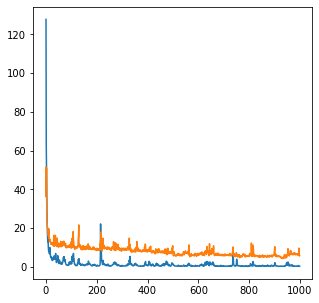

In [32]:
losses = pd.DataFrame(model_history.history)
plt.figure(figsize=(5,5))
plt.plot(losses[['loss','val_loss']])


Text(0.5, 1.0, 'True vs Predicted Value')

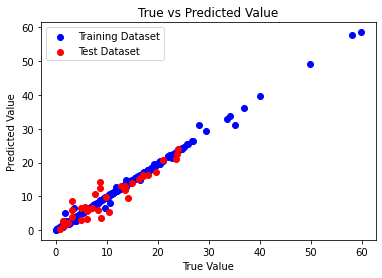

In [41]:
plt.scatter(Y_train,Y_train_pred,c='blue',label='Training Dataset')
plt.scatter(Y_test,Y_test_pred,c='red',label='Test Dataset')
plt.xlabel('True Value')
plt.ylabel('Predicted Value')
plt.legend()
plt.title('True vs Predicted Value')

In [42]:
print('Training Score')
training_score = model.evaluate(X_train,Y_train,verbose=1)


Training Score
11/11 [==============================] - 0s 6ms/step - loss: 0.2893 - mae: 0.2585 - mse: 0.2893


In [43]:
print('Test Score')
test_score = model.evaluate(X_test,Y_test,verbose=1)


Test Score
2/2 [==============================] - 0s 8ms/step - loss: 5.9123 - mae: 1.7905 - mse: 5.9123


In [44]:
from sklearn.metrics import r2_score
r2_score_train=r2_score(Y_train,Y_train_pred)
r2_score_test=r2_score(Y_test,Y_test_pred)

In [45]:
print('Training r2 score=',r2_score_train )
print('Test r2 score=',r2_score_test )

Training r2 score= 0.9963045513492297
Test r2 score= 0.8711283866159147


# RESULT ANALYSIS